# Evaluation of the TSK model

In this notebook the tsk models are tested agains the train and test set from preliminary_analysis.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsk_model import TSKModel
from pyfume import *
import time

In [2]:
expressions = {"P":"Precipitation", "E":"Potential evapotranspiration", "PB":"Precipation balance", "Tave":"Tave"}
#selected_features_custom = ["Relative_yield_change", "Latitude", "Tmax", "Tmin", "Longitude"]
#selected_features_pyfume = ["Latitude", "Tmax", "Tmin", "Longitude", "Relative_yield_change"]
#selected_features = ['Relative_yield_change','yield_of_CT', 'Latitude', 'Longitude',
#       'Years_since_CT_started', 'Crop_rotation_CT', 'Crop_rotation_NT', 'ST',
#       'Soil_cover_in_CT', 'Soil_cover_in_CT', 'Weed_pest_control_CT',
#       'Weed_pest_control_NT', 'P', 'E', 'PB', 'Tave', 'Tmax', 'Tmin']

# Note that we need copies of the datasets since the two models require different column ordering.
selected_features_custom = ["Relative_yield_change", 'yield_of_CT', "Tmax", "Tmin"]
selected_features_pyfume = ['yield_of_CT', "Tmax", "Tmin", "Relative_yield_change"]
train_data_custom = pd.read_csv("dataset/matlab_1_train.csv")[selected_features_custom]
test_data_custom = pd.read_csv("dataset/matlab_1_test.csv")[selected_features_custom]
train_data_pyfume = pd.read_csv("dataset/matlab_1_train.csv")[selected_features_pyfume]
test_data_pyfume = pd.read_csv("dataset/matlab_1_test.csv")[selected_features_pyfume]

Definition of test parameters

In [3]:
cluster_numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10]
quantile_numbers = [0.2, 0.4, 0.6]
n_runs = 20

In [4]:
test_data_pyfume 

,yield_of_CT,Tmax,Tmin,Relative_yield_change
0,7900.0,26.45092,2.04168,-0.0759
1,11756.0,31.98261,-5.42037,-0.1007
2,6220.0,29.34542,16.69589,0.0492
3,6407.0,25.88517,12.58576,-0.0924
4,11240.0,26.37735,2.80240,-0.2278
...,...,...,...,...
243,6200.0,31.54964,-0.20791,0.0000
244,2486.0,30.64233,15.96019,-0.0760
245,4579.0,33.81494,5.66872,0.2466
246,14300.0,24.55087,5.82546,-0.2594


The choice of different trap_quantile parameter value has shown litle effect on the performance of the models. Below we plot four different configurations to see that it actualy has an effect on the fuzzy membership functions.

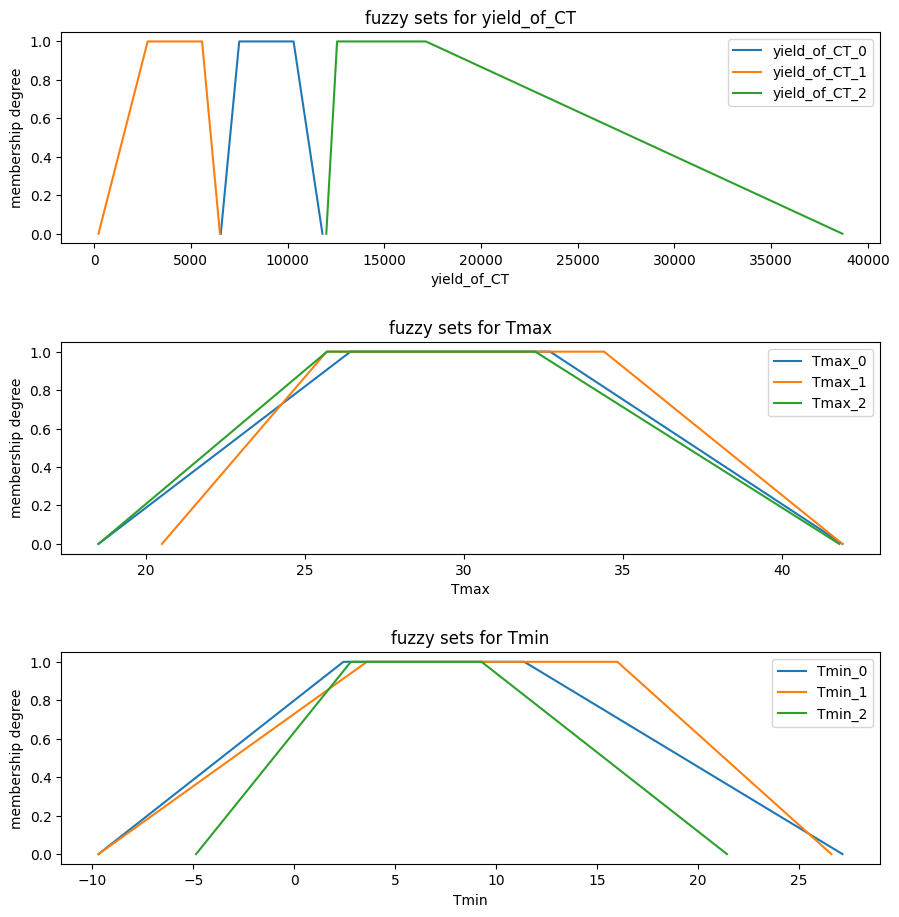

In [18]:
cur_tsk_model = TSKModel()
cur_tsk_model.create_rulebase_kmeans(train_data_custom, n_fuzzy_sets=3, expressions=expressions, trap_quantile=0.2)
cur_tsk_model.show_fuzzy_sets()

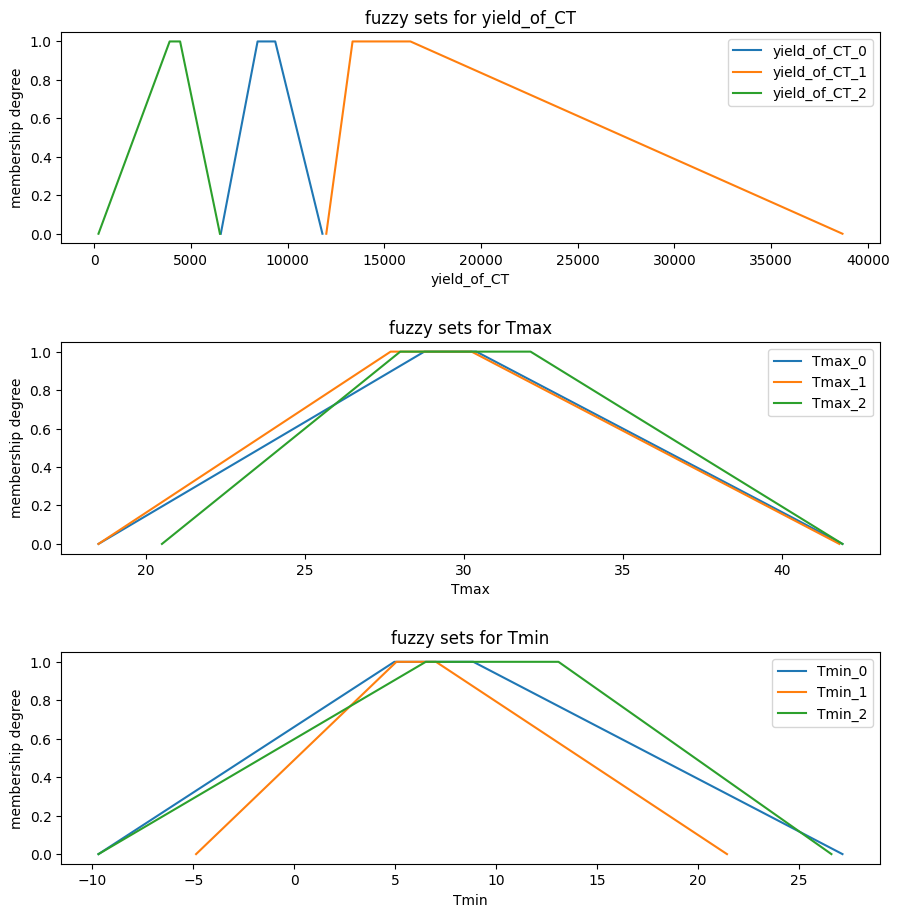

In [19]:
cur_tsk_model = TSKModel()
cur_tsk_model.create_rulebase_kmeans(train_data_custom, n_fuzzy_sets=3, expressions=expressions, trap_quantile=0.4)
cur_tsk_model.show_fuzzy_sets()

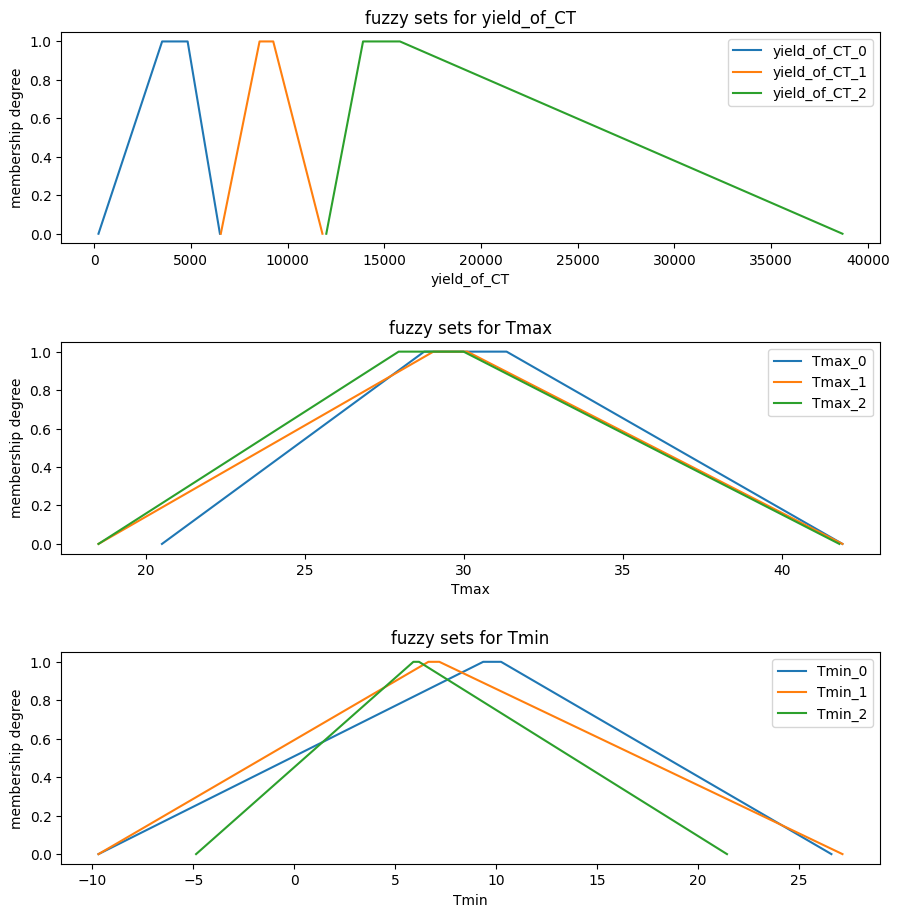

In [20]:
cur_tsk_model = TSKModel()
cur_tsk_model.create_rulebase_kmeans(train_data_custom, n_fuzzy_sets=3, expressions=expressions, trap_quantile=0.6)
cur_tsk_model.show_fuzzy_sets()

In [21]:
cur_tsk_model.rulebase.print_rulebase(cur_tsk_model._feature_fuzzy_sets)

IF x0 in yield_of_CT_0 and x1 in Tmax_0 and x2 in Tmin_0 THEN y = x0 * -0.0000 + x1 * 0.0149 + x2 * -0.0072 + -0.3237
IF x0 in yield_of_CT_1 and x1 in Tmax_1 and x2 in Tmin_1 THEN y = x0 * -0.0000 + x1 * 0.0037 + x2 * 0.0033 + -0.1905
IF x0 in yield_of_CT_2 and x1 in Tmax_2 and x2 in Tmin_2 THEN y = x0 * -0.0000 + x1 * -0.0006 + x2 * 0.0027 + -0.0407


The above plots clearly show that the core is greater for smaler trap_quantile parameters.
Next the test runs are performed. Warning: this operation might take several minutes.

In [7]:
cluster_list_pyfume_training = [[] for n_sets in cluster_numbers]
cluster_list_pyfume_test = [[] for n_sets in cluster_numbers]
pyfume_timer = time.time()
for run in range(n_runs):
     print(f"Starting run {run}")
     cur_clusters_pyfume = {}
     cur_clusters_custom = {}
     for i, n_fuzzy_sets in enumerate(cluster_numbers):
          print(f"n_sets = {n_fuzzy_sets}")
          FIS = pyFUME(dataframe=train_data_pyfume, nr_clus=n_fuzzy_sets)
          cur_model = FIS.get_model()
          cluster_list_pyfume_training[i].append(FIS.calculate_error(method="RMSE"))

          test = SugenoFISTester(model=cur_model, test_data=test_data_pyfume.iloc[:,:-1].to_numpy(), 
                                 variable_names=np.array(selected_features_pyfume[:-1], dtype='<U22'),
                                 golden_standard=test_data_pyfume.iloc[:,-1].to_numpy())
          cluster_list_pyfume_test[i].append(test.calculate_RMSE())
               
pyfume_timer = time.time() - pyfume_timer

Starting run 0
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 1
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 2
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 3
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 4
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 5
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 6
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 7
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 8
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7

In [8]:
cluster_list_custom_training = [[] for n_sets in cluster_numbers]
cluster_list_custom_test = [[] for n_sets in cluster_numbers]
for quantile_number in quantile_numbers:
     for i in range(len(cluster_numbers)):
          cluster_list_custom_training[i].append([])
          cluster_list_custom_test[i].append([])


custom_timer = time.time()
for run in range(n_runs):
     print(f"Starting run {run}")
     cur_clusters_pyfume = {}
     cur_clusters_custom = {}
     for i, n_fuzzy_sets in enumerate(cluster_numbers):
          print(f"n_sets = {n_fuzzy_sets}")
          for j, quantile_number in enumerate(quantile_numbers):
               cur_tsk_model = TSKModel()
               cur_tsk_model.create_rulebase_kmeans(train_data_custom, n_fuzzy_sets=n_fuzzy_sets, expressions=expressions, trap_quantile=quantile_number)
               cluster_list_custom_training[i][j].append(cur_tsk_model.calculate_rmse(train_data_custom))
               cluster_list_custom_test[i][j].append(cur_tsk_model.calculate_rmse(test_data_custom))
               
custom_timer = time.time() - custom_timer

Starting run 0
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 1
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 2
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 3
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 4
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 5
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 6
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 7
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 8
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 9
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 10
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 11
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 12
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 13
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 14
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 15
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 16
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 17
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 18
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 19
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [9]:
np.array(cluster_list_custom_training).shape


(9, 3, 20)

In [10]:
np.array(cluster_list_custom_test).shape

(9, 3, 20)

In [11]:
np.array(cluster_list_pyfume_training).shape

(9, 20)

In [12]:
np.array(cluster_list_pyfume_test).shape

(9, 20)

The model results are aggregated and cleaned up

In [13]:
log = {
    ("labels","n_sets") : [], 
    ("labels", "statistic_measures",) : [], 
    ("pyFume", "train_pyFume") : [], 
    ("pyFume", "test_pyFume") : [], 
    }
for q in quantile_numbers:
    log[("test_custom", f"q_{q}")] = []
    
for q in quantile_numbers:
    log[("train_custom", f"q_{q}")] = []

for i, cluster_number in enumerate(cluster_numbers):
    for name, measure in {"Min" : np.min, "Max" : np.max, "Std" : np.std, "Mean" : np.mean}.items():
        log[("labels", "n_sets")].append(cluster_number)
        log[("labels", "statistic_measures")].append(name)
        log[("pyFume", "train_pyFume")].append(measure(cluster_list_pyfume_training[i]))
        log[("pyFume", "test_pyFume")].append(measure(cluster_list_pyfume_test[i]))
        for j, q in enumerate(quantile_numbers):
            log[("train_custom", f"q_{q}")].append(measure(cluster_list_custom_training[i][j]))
            log[("test_custom", f"q_{q}")].append(measure(cluster_list_custom_test[i][j]))       


Printing results

In [14]:
results = pd.DataFrame(log)
print(f"Runtime for custom implementation: {custom_timer:.4f} s")
print(f"Runtime for pyFume implementation: {pyfume_timer:.4f} s")
print(f"Number of runs per parameterset: {n_runs}")
results[["pyFume", "test_custom", "train_custom"]].set_index(pd.MultiIndex.from_frame(results["labels"]))

Runtime for custom implementation: 556.4387 s
Runtime for pyFume implementation: 337.6953 s
Number of runs per parameterset: 20


pyFume             test_custom            \
                          train_pyFume test_pyFume       q_0.2     q_0.4   
n_sets statistic_measures                                                  
2      Min                    0.184583    0.220890    0.220846  0.220835   
       Max                    0.236191    0.223161    0.221514  0.220846   
       Std                    0.011697    0.000524    0.000203  0.000004   
       Mean                   0.211294    0.221607    0.220928  0.220844   
3      Min                    0.189014    0.220347    0.219904  0.219904   
       Max                    0.228099    0.222064    0.219970  0.219970   
       Std                    0.010407    0.000453    0.000030  0.000033   
       Mean                   0.206491    0.221204    0.219924  0.219937   
4      Min                    0.191597    0.217678    0.218379  0.218379   
       Max                    0.229936    0.221184    0.218524  0.218524   
       Std                    0.009929    0.000792    0.000032  0.000044   
       Mean                   0.212116    0.220044    0.218517  0.218510   
5      Min                    0.189165    0.216679    0.215892  0.215892   
       Max                    0.231155    0.221101    0.220138  0.219937   
       Std                    0.013082    0.000893    0.001075  0.001136   
       Mean                   0.210711    0.218725    0.219340  0.218896   
6      Min                    0.186077    0.216408    0.217663  0.217663   
       Max                    0.218149    0.221035    0.219879  0.221244   
       Std                    0.008355    0.000976    0.000827  0.001246   
       Mean                   0.206985    0.218753    0.218751  0.218755   
7      Min                    0.190648    0.215295    0.220435  0.219841   
       Max                    0.232883    0.226501    0.222908  0.223352   
       Std                    0.012335    0.002633    0.000856  0.000979   
       Mean                   0.208877    0.218815    0.221608  0.221281   
8      Min                    0.182974    0.214857    0.221909  0.221880   
       Max                    0.222623    0.221761    0.222482  0.222482   
       Std                    0.010428    0.001917    0.000153  0.000182   
       Mean                   0.210145    0.217083    0.222034  0.222083   
9      Min                    0.172984    0.214904    0.220303  0.220281   
       Max                    0.272074    0.229894    0.224152  0.223942   
       Std                    0.019580    0.004707    0.001023  0.001016   
       Mean                   0.215731    0.219861    0.221453  0.221919   
10     Min                    0.187682    0.212453    0.221154  0.220938   
       Max                    0.366315    0.234431    0.227045  0.226491   
       Std                    0.036187    0.004154    0.001747  0.001423   
       Mean                   0.212871    0.217379    0.223220  0.222444   

                                    train_custom                      
                              q_0.6        q_0.2     q_0.4     q_0.6  
n_sets statistic_measures                                             
2      Min                 0.220846     0.208765  0.208842  0.208765  
       Max                 0.221092     0.208881  0.208848  0.208842  
       Std                 0.000054     0.000021  0.000002  0.000017  
       Mean                0.220861     0.208841  0.208843  0.208837  
3      Min                 0.219904     0.207530  0.207530  0.207530  
       Max                 0.219970     0.207648  0.207648  0.207648  
       Std                 0.000032     0.000054  0.000059  0.000058  
       Mean                0.219930     0.207565  0.207589  0.207577  
4      Min                 0.218379     0.206354  0.206354  0.206354  
       Max                 0.218524     0.206519  0.206519  0.206519  
       Std                 0.000058     0.000036  0.000049  0.000066  
       Mean                0.218495     0.206511  0.206503  0.206486  
5 

In [15]:
results[["pyFume", "test_custom", "train_custom"]].set_index(pd.MultiIndex.from_frame(results["labels"])).to_csv("first_results.csv", float_format="%.5f")
results.to_csv("first_results_raw.csv")

In [16]:
results[["pyFume", "test_custom", "train_custom"]].columns.to_numpy()

array([('pyFume', 'train_pyFume'), ('pyFume', 'test_pyFume'),
       ('test_custom', 'q_0.2'), ('test_custom', 'q_0.4'),
       ('test_custom', 'q_0.6'), ('train_custom', 'q_0.2'),
       ('train_custom', 'q_0.4'), ('train_custom', 'q_0.6')], dtype=object)

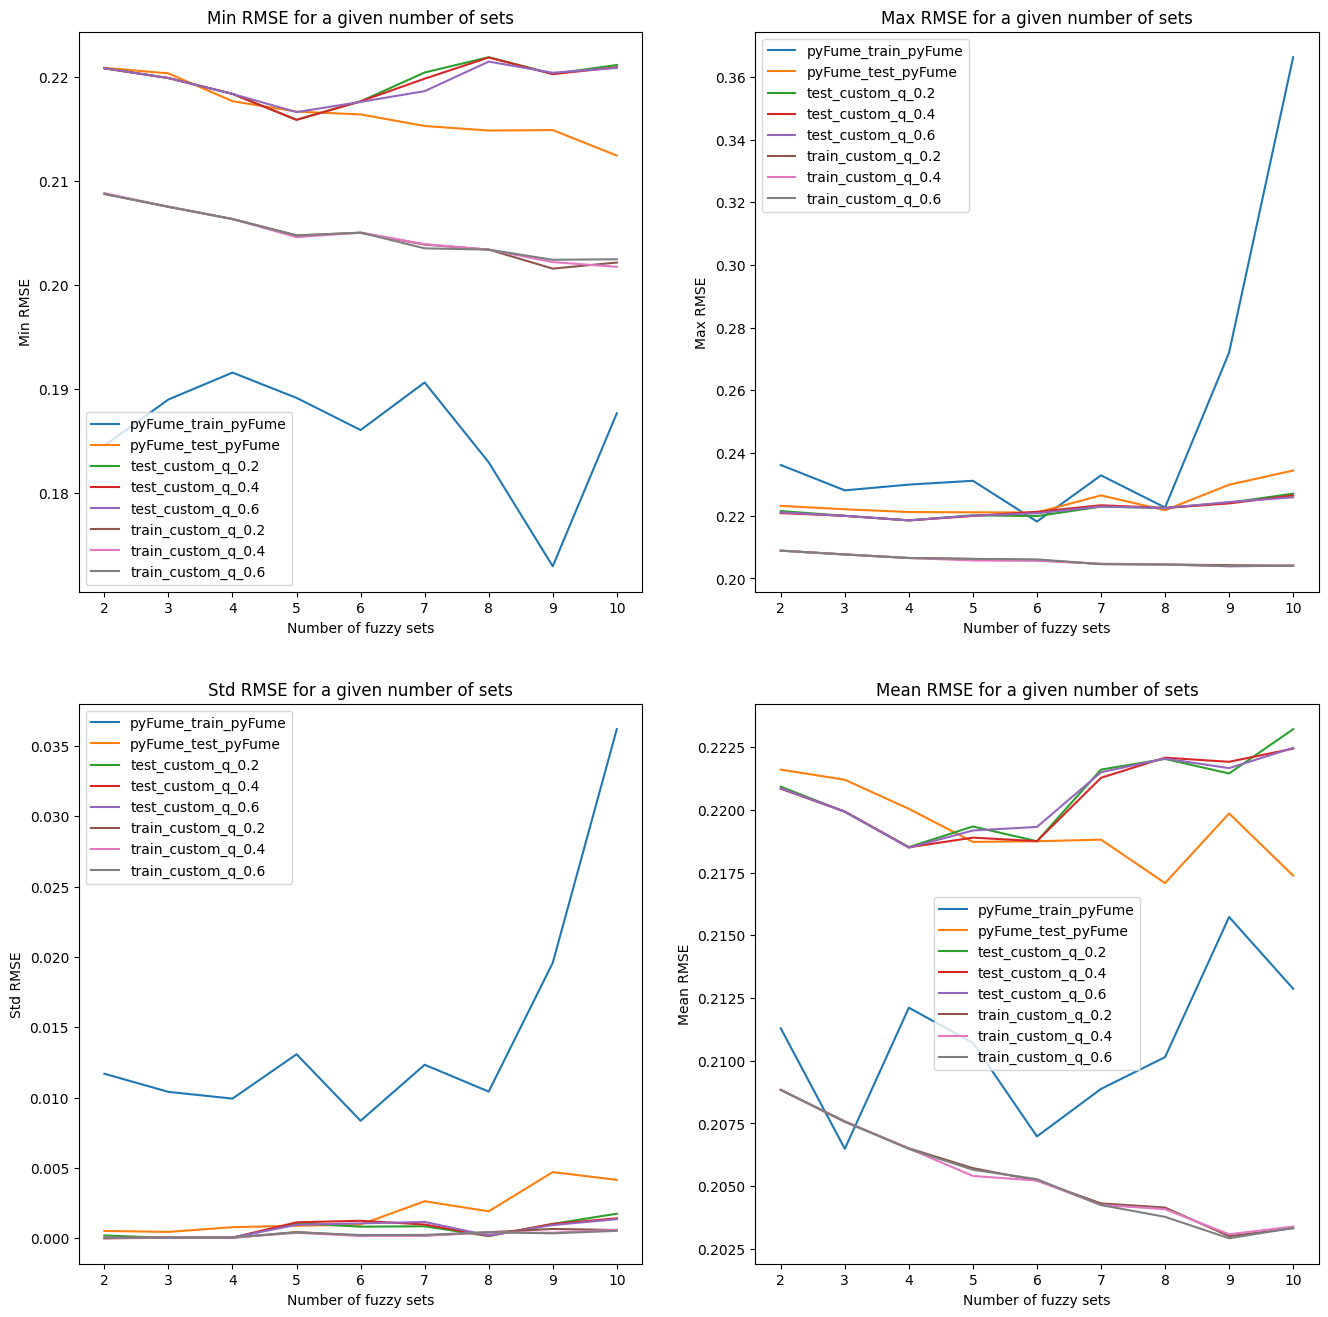

In [17]:
fig, axes = plt.subplots(2,2, figsize=(16, 16))
measure_list = results["labels"]["statistic_measures"].unique()
for i, measure_label in enumerate(measure_list):
    cur_axis = axes[int(i/(len(measure_list)/2)),int(i%(len(measure_list)/2))]
    cur_axis.set_title(f"{measure_label} RMSE for a given number of sets")
    cur_axis.set_xlabel(f"Number of fuzzy sets")
    cur_axis.set_ylabel(f"{measure_label} RMSE")
    for parent, column in results[["pyFume", "test_custom", "train_custom"]].columns.to_numpy():
        cur_y = results[results["labels"]["statistic_measures"] == measure_label][parent][column]
        cur_x = results[results["labels"]["statistic_measures"] == measure_label]["labels"]["n_sets"]
        cur_axis.plot(cur_x, cur_y, label=f"{parent}_{column}")

    cur_axis.legend()